<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

# Data Science Basics in Python Series

## Chapter III.b: Matplotlib for Bivariate Data Visualization in Python 

### Michael Pyrcz, Associate Professor, The University of Texas at Austin 

*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

#### Data Visualization with MatPlotLib in Python for Engineers and Geoscientists 

This is a tutorial for / demonstration of **Univariate Data Visualization in Python**. In Python, a common tool for dealing with Data Visualization is the **Matplotlib Python package**

* Initiated by John Hunter along with many contributors

* Opensource project is a sponsored project of [NumFocus](https://numfocus.org/) 

This tutorial includes the methods and operations that would commonly be required for Engineers and Geoscientists working with Data Visualization for the purpose of:

1. Data Checking and Cleaning
2. Data Mining / Inferential Data Analysis
3. Predictive Modeling

for Data Analytics, Geostatistics and Machine Learning.

##### Data Visualization

Data visualization includes any graphical representation of the data. 

We will demonstrate basic concepts with only:

* bivariate distributions with univariate histograms

We will start simple and add more complexity and customization.

#### Project Goal

Learn the basics for working with Bivariate Data Visualization in Python to build practical spatial data analytics, geostatistics and machine learning workflows.

* Focus on customization and not a survey of available plot times

#### Caveats

I included methods that I have found useful for building my geoscience and engineering workflows for subsurface modeling. I think they should be accessible to most geoscientists and engineers. Certainly, there are more advanced, more compact, more efficient methods to accomplish the same tasks. I tried to keep the methods simple. I appreciate feedback and I will use it to improve this tutorial periodically.

#### Load and Configure the Required Libraries

The following code loads the required libraries and sets a plotting default.

In [3]:
import os                                       # operating system
import numpy as np                              # arrays and matrix math
import pandas as pd                             # tabular data
import matplotlib.pyplot as plt                 # plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
plt.rc('axes', axisbelow=True)                  # set axes and grids in the background for all plots
from matplotlib.patches import Rectangle        # drawing shapes on plots
import seaborn as sns                           # advanced statistical methods and plots

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this directory.  When we are done with this tutorial we will write our new dataset back to this directory.  

In [4]:
#os.chdir("c:/PGE383")                           # set the working directory

#### Loading the Datasets

Let's load a tabular dataset from another .csv file, [spatial_nonlinear_MV_facies_v1.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/spatial_nonlinear_MV_facies_v1.csv)

We cover loading data in these previous **Data Science Basics in Python** lectures, [tabular data](https://www.youtube.com/watch?v=rku5rZxS0AA) and [gridded data](https://www.youtube.com/watch?v=uCRkFwQqdJo)

In [6]:
#df = pd.read_csv('nonlinear_facies_v1.csv')    # load the tabular dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/nonlinear_facies_v1.csv')
df = df.iloc[:,1:]                              # remove the first feature (column)

print('The tabular data is a ' + str(type(df)) + ' with ' + str(len(df)) + ' samples.')     
df.head(n=3)

The tabular data is a <class 'pandas.core.frame.DataFrame'> with 1700 samples.


,Por,Perm,Facies
0,5.884729,777.927713,3
1,5.579639,741.831286,3
2,3.732165,720.502871,3


#### Extract the Feature from the Table

I do this for concise and readable code

In [7]:
por = df['Por'].values                          # extract porosity feature a a 1D ndarray
perm = df['Perm'].values

print('The por is a ' + str(type(por)) + ' of shape ' + str(por.shape) + '.')
print('The perm is a ' + str(type(perm)) + ' of shape ' + str(perm.shape) + '.')

The por is a <class 'numpy.ndarray'> of shape (1700,).
The perm is a <class 'numpy.ndarray'> of shape (1700,).


#### Summary Statistics for Plotting

Let's calculate the minimum and maximum values for each feature and assign a good range for plotting

In [8]:
print('The porosity range is [' + str(np.min(por)) + ',' + str(np.max(por)) + '].')
print('The permeability range is [' + str(np.min(perm)) + ',' + str(np.max(perm)) + '].')
pormin = 0.0; pormax = 32.0
permmin = 0.0; permmax = 1350.0

The porosity range is [0.0,30.0].
The permeability range is [10.0,1200.0].


#### Univariate 

Let's start with univariate, the basic histogram plots for each of the two feature.

* Quite a plain plot
* See the previous live code lecture, [Data Science Basics in Python: Univariate Visualization](https://www.youtube.com/watch?v=QQpzwSFC4x0&list=PLG19vXLQHvSAufDFgZEFAYQEwMJXklnQV&index=3) 

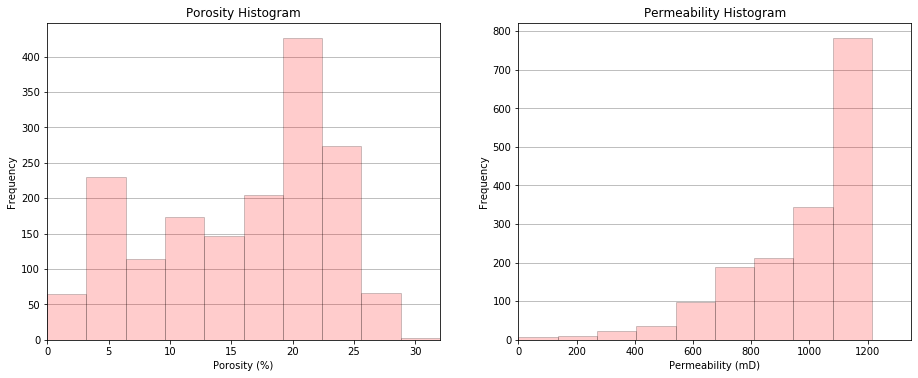

In [9]:
plt.subplot(121)
plt.hist(x=por,edgecolor='black',bins=np.linspace(pormin,pormax,11),color='red',alpha=0.2) # basic histogram
plt.xlim([pormin,pormax]); plt.xlabel('Porosity (%)'); plt.ylabel('Frequency'); plt.title('Porosity Histogram'); plt.grid(axis='y')

plt.subplot(122)
plt.hist(x=perm,edgecolor='black',bins=np.linspace(permmin,permmax,11),color='red',alpha=0.2) # basic histogram
plt.xlim([permmin,permmax]); plt.xlabel('Permeability (mD)'); plt.ylabel('Frequency'); plt.title('Permeability Histogram'); plt.grid(axis='y')

plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=1.1); plt.show() # set plot size and show

Interesting, the two feature have distinctly difference distributions.

* porosity is symmetric while permeability is positively skewed

#### Scatter Plots

Let's now look at the relationship between the two features

* we start with a basic scatter plot

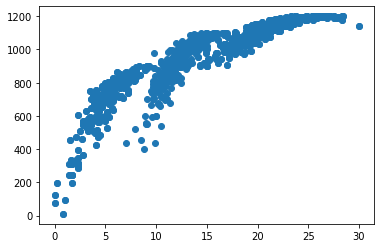

In [10]:
plt.scatter(x=por,y=perm)                       # basic scatter plot

This is an interesting dataset. 
* nonlinear, heteroscedastic, multiple populations

#### Design the Plot Space

Let's improve the plot by considering and designing the plot space.
    
* Label the axes (.xlabel(),.ylabel()), always the 'right' answer!
* Add a grid (.grid()) to improve our ability to perform 'ocular inspection'
* We explicity control the plot size, start considering readability
* Consider color (color = string) to separate elements, i.e. foreground and background

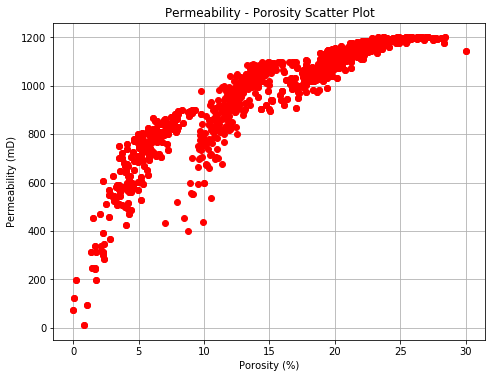

In [11]:
plt.scatter(x=por,y=perm,color = 'red')        # basic scatter plot

plt.xlabel('Porosity (%)'); plt.ylabel('Permeability (mD)'); plt.title('Permeability - Porosity Scatter Plot') # axes labels
plt.grid()                                     # add grid
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Compose the Elements

Let's think more about how we can combine all the elements to improve clarity

* Outline the data points (edgecolor = string) to better separate the data
* Use transparency (alpha < 1.0) to further improve our perception of relative data density, joint probability 

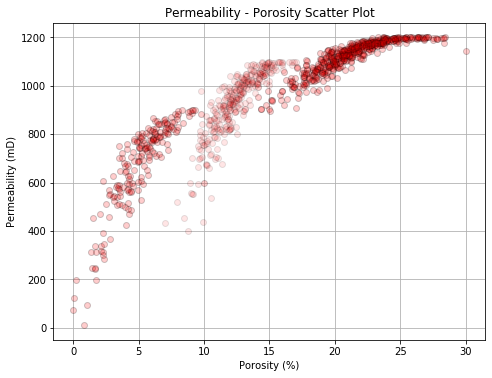

In [13]:
plt.scatter(x=por,y=perm,color = 'red',edgecolor='black',alpha=0.1) # basic scatter plot
plt.xlabel('Porosity (%)'); plt.ylabel('Permeability (mD)'); plt.title('Permeability - Porosity Scatter Plot') # axes labels

plt.grid()                                     # add grid
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Improve the Consistency Between Elements

Let's improve the consistency of the plot elements.

* Specify the axes' extents (.xlim(),.ylim()) and align yaxes increments with integer frequency
* Add a minor grid and ticks for readibility

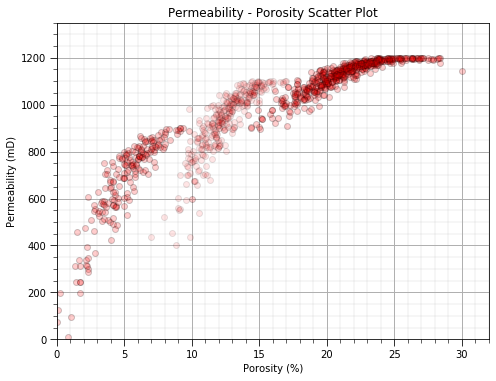

In [14]:
plt.scatter(x=por,y=perm,color = 'red',edgecolor='black',alpha=0.1) # basic scatter plot
plt.xlabel('Porosity (%)'); plt.ylabel('Permeability (mD)'); plt.title('Permeability - Porosity Scatter Plot') # axes labels
plt.xlim([pormin,pormax]); plt.ylim([permmin,permmax]); plt.grid() # add grid

plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Make a Custom Plot Function

We have a good plot now, but it requires quite a bit of code.
* we can make a convenient function to make this plot for any dataset. I like to do this for concise, read-able workflows.

In [15]:
def my_scatterplot(x,xmin,xmax,xlabel,y,ymin,ymax,ylabel,title):
    plt.scatter(x=x,y=y,s=15,color = 'red',edgecolor='black',alpha=0.05) # basic scatter plot
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title) # axes labels
    plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax]); plt.grid() # add grid
    
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks
    
print('my_scatter plot is a ' + str(type(my_scatterplot)) + '.')

my_scatter plot is a <class 'function'>.


Now let's try out our custom plot function.

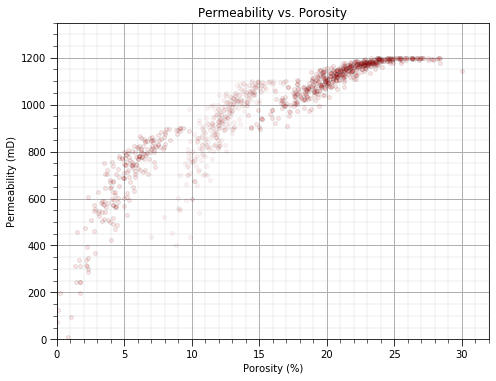

In [16]:
my_scatterplot(por,pormin,pormax,'Porosity (%)',perm,permmin,permmax,'Permeability (mD)','Permeability vs. Porosity')
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Adding a $3^{rd}$ Dimension

Of course, we could plot the facies categorical feature to observe the mixture of 3 distinct populations.

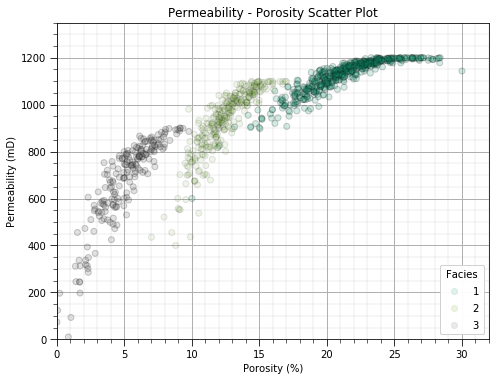

In [18]:
scatter = plt.scatter(x=por,y=perm,c = df['Facies'],edgecolor='black',alpha=0.1,cmap=plt.cm.Dark2,label=['Sand','Mixed','Shale']) # basic scatter plot
plt.xlabel('Porosity (%)'); plt.ylabel('Permeability (mD)'); plt.title('Permeability - Porosity Scatter Plot') # axes labels
plt.xlim([pormin,pormax]); plt.ylim([permmin,permmax]); plt.grid() # add grid

legend = plt.gca().legend(*scatter.legend_elements(),loc="lower right", title="Facies")
plt.gca().add_artist(legend)

plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Bivariate Conditional Distributions

It is often useful to calculate conditional statistics with respect to the other feature binned. First we make our bins over porosity.

In [21]:
nbins = 8
por_bins = np.linspace(pormin,pormax,nbins)     # set the bin boundaries and then the centroids for plotting
por_centroids = np.linspace((por_bins[0]+por_bins[1])*0.5,(por_bins[nbins-2]+por_bins[nbins-1])*0.5,nbins-1)
df['por_bins'] = pd.cut(df['Por'], por_bins,labels = por_centroids) # cut on bondaries and lable with centroids 
df.head()

,Por,Perm,Facies,por_bins
0,5.884729,777.927713,3,6.857143
1,5.579639,741.831286,3,6.857143
2,3.732165,720.502871,3,2.285714
3,3.081551,545.878794,3,2.285714
4,9.079613,888.300959,3,6.857143


Then we calculate the conditional statistics and add to our custom plot.

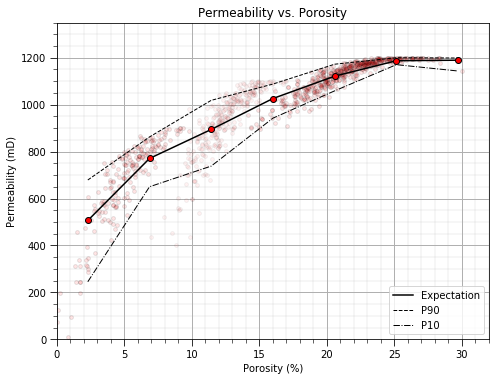

In [22]:
cond_exp = df.groupby('por_bins')['Perm'].mean() # calculate conditional statistics
cond_P90 = df.groupby('por_bins')['Perm'].quantile(.9)
cond_P10 = df.groupby('por_bins')['Perm'].quantile(.1)

my_scatterplot(por,pormin,pormax,'Porosity (%)',perm,permmin,permmax,'Permeability (mD)','Permeability vs. Porosity')
plt.plot(por_centroids,cond_exp,color='black',label='Expectation'); plt.scatter(por_centroids,cond_exp,color='red',edgecolor='black',zorder=10) 
plt.plot(por_centroids,cond_P90,'r--',color='black',linewidth = 1.0,label='P90')
plt.plot(por_centroids,cond_P10,'r-.',color='black',linewidth = 1.0,label='P10')
plt.legend(loc='lower right')
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Bivariate Joint Distributions

We may also want to visualize the bivariate joint distributions in our data. We can use the [seaborn](https://seaborn.pydata.org/) Python package to accomplish this with a kernel density estimate plot.

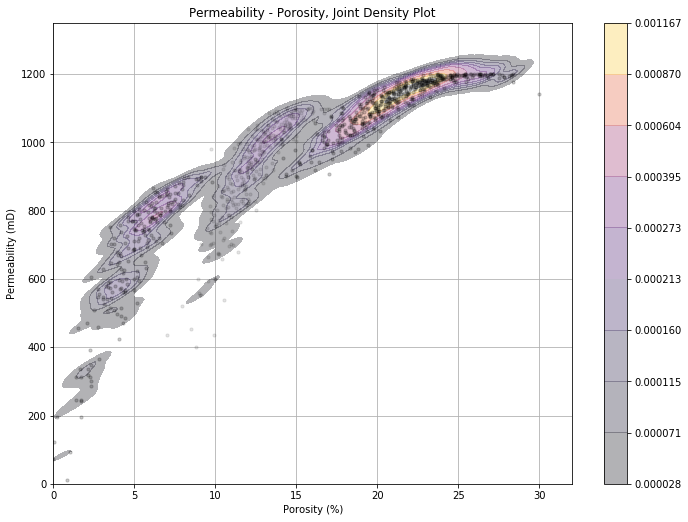

In [24]:
sns.kdeplot(data=df, x="Por", y="Perm",cmap=sns.color_palette("inferno", as_cmap=True),levels=np.linspace(0.05,0.9,10),bw_adjust = 0.4,alpha=0.3,label ="Train Density",shade=True,cbar=True) # estimate joint PDF
plt.scatter(x=por,y=perm,s=10,marker='o',color='black',alpha=0.1) # add the data scatter plot
plt.xlabel('Porosity (%)'); plt.ylabel('Permeability (mD)'); plt.title('Permeability - Porosity, Joint Density Plot') # axes labels
plt.xlim([pormin,pormax]); plt.ylim([permmin,permmax]); plt.grid() # add grid
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.5,top=1.6); plt.show() # set plot size

#### Bivariate Marginals and Joint Distributions

We may also want to visualize the bivariate marginal and joint distributions together. We can use the [seaborn](https://seaborn.pydata.org/) Python package to accomplish this with a joint plot.

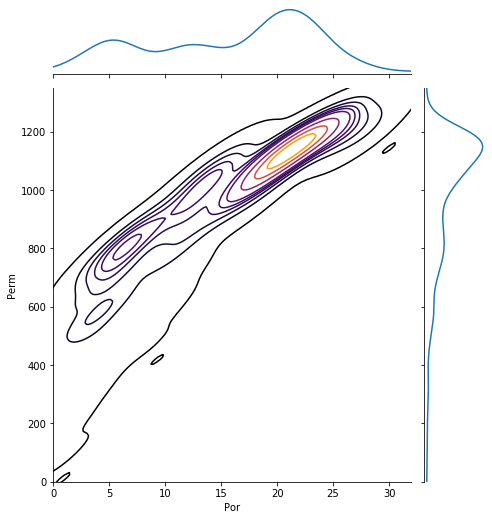

In [25]:
sns.jointplot(x='Por',y='Perm',data=df,kind='kde',xlim=[pormin,pormax],ylim=[permmin,permmax],shade = False,n_levels=10,cmap=plt.cm.inferno,thresh = 0.01);
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Bivariate Marginals and Joint Distributions with Multiple Populations

Let's repeat the previous bivariate plot with separate populations, facies.

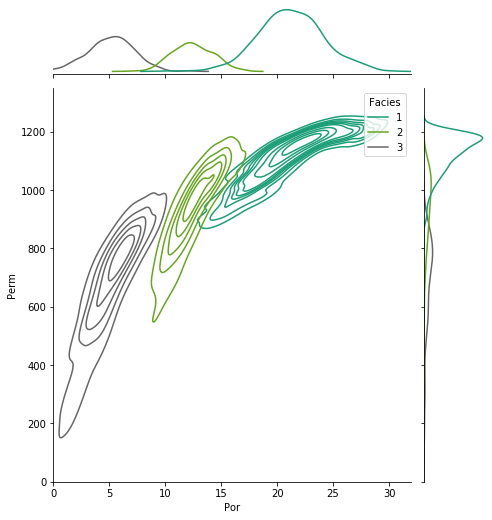

In [26]:
sns.jointplot(data=df, x='Por', y='Perm', kind='kde',hue='Facies',xlim=[pormin,pormax],ylim=[permmin,permmax],palette=plt.cm.Dark2)
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Bivariate Binned Marginals and Joint Distributions

Finally we can bin the bivariate marginals and joint distributions

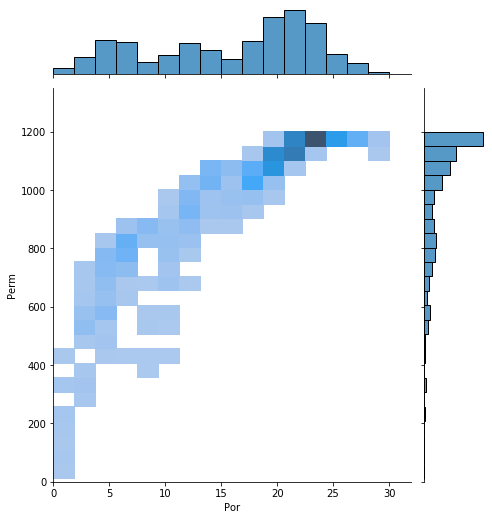

In [28]:
sns.jointplot(x='Por',y='Perm',data=df,kind='hist',xlim=[pormin,pormax],ylim=[permmin,permmax]);
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Comments

This was a basic overview of bivariate visualization for data science basics in Python. I share all of my university educational content to support my students and working professionals. Go here for an inventory of my [shared educational resources](https://michaelpyrcz.com/my-resources).

I hope this we helpful,

Michael

#### More About The Author:

### Michael Pyrcz, Associate Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin